<a href="https://colab.research.google.com/github/mohanrajmit/Unet_Semantic_Segmentation/blob/master/unet_segmentation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNET SEGMENTATION

Arxiv Link: <a href="https://arxiv.org/abs/1505.04597">U-Net: Convolutional Networks for Biomedical Image Segmentation</a>

<ul>
<li>UNet is a fully convolutional network(FCN) that does image segmentation. Its goal is to predict each pixel's class.</li>
 
<li>UNet is built upon the FCN and modified in a way that it yields better segmentation in medical imaging.</li>
</ul>

## 1.1 Architecture

<img src="https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow/blob/master/images/u-net-architecture.png?raw=1"/>

<h3>UNet Architecture has 3 parts:</h3>
<ol>
    <li>The Contracting/Downsampling Path</li>
    <li>Bottleneck</li>
    <li>The Expanding/Upsampling Path</li>
</ol>

<h3>Downsampling Path: </h3> 
<ol>
    <li>It consists of two 3x3 convolutions (unpadded convolutions), each followed by a rectified linear unit (ReLU) and a 2x2 max pooling operation with stride 2 for downsampling.</li> 
    <li>At each downsampling step we double the number of feature channels.</li>
</ol>

<h3>Upsampling Path: </h3> 
<ol>
     <li> Every  step  in  the  expansive  path  consists  of  an  upsampling  of  the feature map followed by a 2x2 convolution (“up-convolution”), a concatenation with the correspondingly feature  map  from  the  downsampling  path,  and  two  3x3  convolutions,  each  followed by a ReLU.</li>
</ol>

<h3> Skip Connection: </h3>
The skip connection from the downsampling path are concatenated with feature map during upsampling path. These skip connection provide local information to global information while upsampling.

<h3> Final Layer: </h3>
At the final layer a 1x1 convolution is used to map each feature vector to the desired number of classes.

## 1.2 Advantages
<h3> Advantages: </h3>
<ol>
    <li>The UNet combines the location information from the downsampling path to finally obtain a general information combining localisation and context, which is necessary to predict a good segmentation map.</li>
    <li>No Dense layer is used, so image sizes can be used.</li>
</ol>

## 1.3 Dataset
Link: <a href="https://www.kaggle.com/c/data-science-bowl-2018">Data Science Bowl 2018</a>
Find the nuclei in divergent images to advance medical discovery

In [0]:
from imutils import paths

In [2]:
!git clone https://github.com/s0007/Unetsegmentation.git

Cloning into 'Unetsegmentation'...
remote: Enumerating objects: 4848, done.
remote: Total 4848 (delta 0), reused 0 (delta 0), pack-reused 4848
Receiving objects: 100% (4848/4848), 764.75 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [3]:
!apt install zip
!mkdir /content/dataset



Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
!unzip /content/Unetsegmentation/dataset.zip -d /content/

Archive:  /content/Unetsegmentation/dataset.zip
  inflating: /content/dataset/26_10.tif  
  inflating: /content/dataset/26_100.tif  
  inflating: /content/dataset/26_100_mask.tif  
  inflating: /content/dataset/26_101.tif  
  inflating: /content/dataset/26_101_mask.tif  
  inflating: /content/dataset/26_102.tif  
  inflating: /content/dataset/26_102_mask.tif  
  inflating: /content/dataset/26_103.tif  
  inflating: /content/dataset/26_103_mask.tif  
  inflating: /content/dataset/26_104.tif  
  inflating: /content/dataset/26_104_mask.tif  
  inflating: /content/dataset/26_105.tif  
  inflating: /content/dataset/26_105_mask.tif  
  inflating: /content/dataset/26_106.tif  
  inflating: /content/dataset/26_106_mask.tif  
  inflating: /content/dataset/26_107.tif  
  inflating: /content/dataset/26_107_mask.tif  
  inflating: /content/dataset/26_108.tif  
  inflating: /content/dataset/26_108_mask.tif  
  inflating: /content/dataset/26_109.tif  
  inflating: /content/dataset/26_109_mask.tif  


In [0]:
from natsort import natsorted

In [0]:
ImagesPath=natsorted(paths.list_images("/content/dataset"))

In [8]:
print(ImagesPath)

['/content/dataset/26_5.tif', '/content/dataset/26_5_mask.tif', '/content/dataset/26_6.tif', '/content/dataset/26_6_mask.tif', '/content/dataset/26_7.tif', '/content/dataset/26_7_mask.tif', '/content/dataset/26_8.tif', '/content/dataset/26_8_mask.tif', '/content/dataset/26_9.tif', '/content/dataset/26_9_mask.tif', '/content/dataset/26_10.tif', '/content/dataset/26_10_mask.tif', '/content/dataset/26_11.tif', '/content/dataset/26_11_mask.tif', '/content/dataset/26_12.tif', '/content/dataset/26_12_mask.tif', '/content/dataset/26_13.tif', '/content/dataset/26_13_mask.tif', '/content/dataset/26_14.tif', '/content/dataset/26_14_mask.tif', '/content/dataset/26_15.tif', '/content/dataset/26_15_mask.tif', '/content/dataset/26_16.tif', '/content/dataset/26_16_mask.tif', '/content/dataset/26_17.tif', '/content/dataset/26_17_mask.tif', '/content/dataset/26_18.tif', '/content/dataset/26_18_mask.tif', '/content/dataset/26_19.tif', '/content/dataset/26_19_mask.tif', '/content/dataset/26_20.tif', '/co

In [17]:
import os
import cv2
imagepath = []
maskpath = []
imageslist =[]
masklist =[]
for imagePath in ImagesPath:    
   print(imagePath)
   image = cv2.imread(imagePath,0)
   filename = os.path.split(imagePath)[-1]
   csv_filename = os.path.splitext(filename)[0]
   testfilename = csv_filename[csv_filename.rfind("_") + 1:]
   print(filename)
   print(csv_filename)
   print(testfilename)
   if testfilename == "mask":
     masklist.append(image)
     maskpath.append(imagePath)
   else:
    imageslist.append(image)
    imagepath.append(imagePath)
  

/content/dataset/26_5.tif
26_5.tif
26_5
5
/content/dataset/26_5_mask.tif
26_5_mask.tif
26_5_mask
mask
/content/dataset/26_6.tif
26_6.tif
26_6
6
/content/dataset/26_6_mask.tif
26_6_mask.tif
26_6_mask
mask
/content/dataset/26_7.tif
26_7.tif
26_7
7
/content/dataset/26_7_mask.tif
26_7_mask.tif
26_7_mask
mask
/content/dataset/26_8.tif
26_8.tif
26_8
8
/content/dataset/26_8_mask.tif
26_8_mask.tif
26_8_mask
mask
/content/dataset/26_9.tif
26_9.tif
26_9
9
/content/dataset/26_9_mask.tif
26_9_mask.tif
26_9_mask
mask
/content/dataset/26_10.tif
26_10.tif
26_10
10
/content/dataset/26_10_mask.tif
26_10_mask.tif
26_10_mask
mask
/content/dataset/26_11.tif
26_11.tif
26_11
11
/content/dataset/26_11_mask.tif
26_11_mask.tif
26_11_mask
mask
/content/dataset/26_12.tif
26_12.tif
26_12
12
/content/dataset/26_12_mask.tif
26_12_mask.tif
26_12_mask
mask
/content/dataset/26_13.tif
26_13.tif
26_13
13
/content/dataset/26_13_mask.tif
26_13_mask.tif
26_13_mask
mask
/content/dataset/26_14.tif
26_14.tif
26_14
14
/content

In [0]:
import numpy as np
image_list = np.array(imageslist)
mask_list  = np.array(masklist)

In [20]:
for image_path,mask_path in zip(imagepath,maskpath):
  print(image_path, mask_path)

#print(imagepath[0])
#print(maskpath[0])

/content/dataset/26_5.tif /content/dataset/26_5_mask.tif
/content/dataset/26_6.tif /content/dataset/26_6_mask.tif
/content/dataset/26_7.tif /content/dataset/26_7_mask.tif
/content/dataset/26_8.tif /content/dataset/26_8_mask.tif
/content/dataset/26_9.tif /content/dataset/26_9_mask.tif
/content/dataset/26_10.tif /content/dataset/26_10_mask.tif
/content/dataset/26_11.tif /content/dataset/26_11_mask.tif
/content/dataset/26_12.tif /content/dataset/26_12_mask.tif
/content/dataset/26_13.tif /content/dataset/26_13_mask.tif
/content/dataset/26_14.tif /content/dataset/26_14_mask.tif
/content/dataset/26_15.tif /content/dataset/26_15_mask.tif
/content/dataset/26_16.tif /content/dataset/26_16_mask.tif
/content/dataset/26_17.tif /content/dataset/26_17_mask.tif
/content/dataset/26_18.tif /content/dataset/26_18_mask.tif
/content/dataset/26_19.tif /content/dataset/26_19_mask.tif
/content/dataset/26_20.tif /content/dataset/26_20_mask.tif
/content/dataset/26_21.tif /content/dataset/26_21_mask.tif
/conten

In [21]:
print(image_list.shape)
print(mask_list.shape)

(500, 420, 580)
(500, 420, 580)


## 1.4 Code

In [0]:
image = image/255.0
mask = mask/255.0

In [0]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

## Data Generator

## Hyperparameters

In [26]:
from keras.layers import Lambda

Using TensorFlow backend.


## Different Convolutional Blocks

In [0]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    print("up blcok")
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def up_block_resize(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    print("up blcok resize")
    us = keras.layers.UpSampling2D((2, 2))(x)
    print(us.shape)
   # l1 = Lambda(lambda image: tf.image.resize_images(image,(105,145)))(us)
   # l1=tf.image.resize_images(us, 105, 145, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
   # l2 = tf.cast(l1, tf.uint8)
    l1 = tf.image.resize(us, [105, 145])
    print(l1.shape)
    concat = keras.layers.Concatenate()([l1, skip])
    print(concat.shape)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

## UNet Model

In [0]:
def UNet():
    f = [16, 32, 64, 128, 256,512]
    inputs = keras.layers.Input((420, 580, 1))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    print(p1.shape)
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    print(p2.shape)
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    print(p3.shape)
    c4, p4 = down_block(p3, f[3]) #16->8
    print(p4.shape)
    c5, p5  = down_block(p4, f[4]) #8->4
    print(p5.shape)

    bn = bottleneck(p5, f[5])
    
    u1 = up_block(bn, c5, f[4]) #4 -> 8
    print(u1.shape)
    u2 = up_block(u1, c4, f[3]) #8 -> 16
    print(u2.shape)
    u3 = up_block_resize(u2, c3, f[2]) #16 -> 32
    print(u3.shape)
    u4 = up_block(u3, c2, f[1]) #32 -> 64
    print(u4.shape)
    u5 = up_block(u4, c1, f[0]) #64 -> 128
    print(u5.shape)
    
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u5)
    model = keras.models.Model(inputs, outputs)
    return model

In [29]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

(None, 210, 290, 16)
(None, 105, 145, 32)
(None, 52, 72, 64)
(None, 26, 36, 128)
(None, 13, 18, 256)
up blcok
(None, 26, 36, 256)
up blcok
(None, 52, 72, 128)
up blcok resize
(None, 104, 144, 128)
(None, 105, 145, 128)
(None, 105, 145, 192)
(None, 105, 145, 64)
up blcok
(None, 210, 290, 32)
up blcok
(None, 420, 580, 16)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 580, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 420, 580, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 420, 580, 16) 2320        conv

## Training the model

In [30]:
model.fit(image_list,mask_list,batch_size=10,epochs=10)

Epoch 1/10
50/50 [==============================] - 17s 349ms/step - loss: 33.0749 - acc: 0.8514
Epoch 2/10
50/50 [==============================] - 18s 351ms/step - loss: 42.6524 - acc: 0.9892
Epoch 3/10
50/50 [==============================] - 18s 351ms/step - loss: 42.6524 - acc: 0.9892
Epoch 4/10
50/50 [==============================] - 18s 353ms/step - loss: 42.6524 - acc: 0.9892
Epoch 5/10
50/50 [==============================] - 18s 355ms/step - loss: 42.6524 - acc: 0.9892
Epoch 6/10
50/50 [==============================] - 18s 357ms/step - loss: 42.6524 - acc: 0.9892
Epoch 7/10
50/50 [==============================] - 18s 357ms/step - loss: 42.6524 - acc: 0.9892
Epoch 8/10
50/50 [==============================] - 18s 357ms/step - loss: 42.6524 - acc: 0.9892
Epoch 9/10
50/50 [==============================] - 18s 358ms/step - loss: 42.6524 - acc: 0.9892
Epoch 10/10
50/50 [==============================] - 18s 363ms/step - loss: 42.6524 - acc: 0.9892


## Testing the model

In [0]:
## Save the Weights
model.save_weights("UNetW.h5")

## Dataset for prediction
x, y = valid_gen.__getitem__(1)
result = model.predict(x)

result = result > 0.5

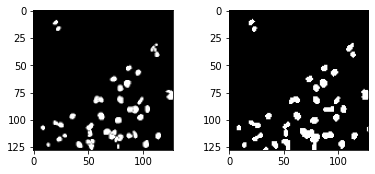

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

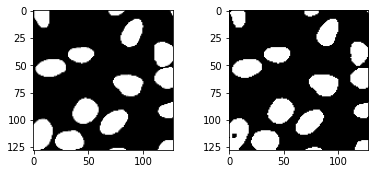

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)), cmap="gray")